<a href="https://colab.research.google.com/github/minjeong-kim-git/GNUVILL_AI/blob/main/GNUVILL_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EC%8A%A4%ED%84%B0%EB%94%94(%EC%A4%91%EA%B8%89)_10%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GNUVILL 인공지능 스터디(중급) 10주차 실습

주제: ReLU를 사용한 mnist 손글씨 숫자 분류 DNN 모델 만들기

# 0. 들어가기 전: ReLU 함수 구현해보기

In [ ]:
import numpy as np
import matplotlib.pylab as plt

**ReLu(Rectified Linear unit)**는 hidden layer에서 쓰이는 활성함수의 일종입니다, 

저희가 전에 다룬 sigmoid함수는 출력 레이어에서 출력이 0~1 사이의 범위에 있기 때문에 주로 쓰입니다. sigmoid 함수 다시 갖고 와불게요!

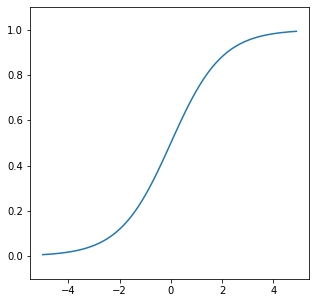

In [ ]:
# 비교할 sigmoid 함수 다시 갖고 오기
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

**Heaviside(헤비사이드) 함수**: 0보다 작은 실수에 대해서 0, 0보다 큰 실수에 대해서 1, 0에 대해서 1/2의 값을 갖는 함수입니다.

머신러닝은 데이터를 넣으면 머신이 스스로 학습을 하는 개념입니다. 이때 **미분**을 통해서 학습을 합니다.

여기서 Heaviside 함수를 미분한다면, 미분값이 0을 제외한 함수에서 모든 값이 0으로 나오기 때문에 머신러닝을 할 수 없는 함수입니다.

return np.array(x > 0, dtype=np.int) 여기서 X>0은 X가 0보다 크면 TRUE 작으면 FALSE로 나옵니다. 그 뒤 dtype=np.int 에서 TRUE이면 정수 1, FALSE 이면 정수 0 으로 바꾸어주는 역할을 합니다.

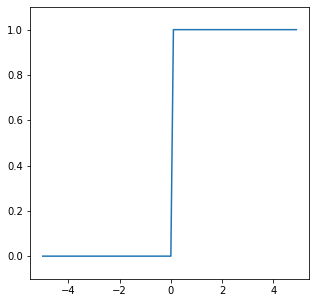

In [ ]:
def step_function(x):
    return np.array(x > 0, dtype=np.int) 

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

얕은 신경망에서는 괜찮지만, 깊은 신경망에서는 Sigmoid 함수로도 문제가 생길 수 있습니다. **기울기 소멸 문제**가 생깁니다.

혹시 경사하강법 기억하시나요?

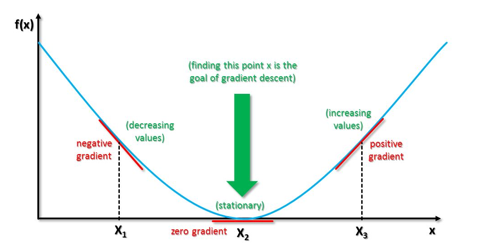

이 문제를 해결하기 위해 깊은 신경망에서는 ReLU 함수를 씁니다! ReLu 함수는 음수일때는 0, 양수일때는 기울기가 1인 직선입니다.

ReLU 함수는 sigmoid, tanh보다 학습이 빠르고 연산 비용이 적으며 구현이 아주 간단하지만 0보다 작은 값들에서는 뉴런이 죽을 수 있다는 단점이 있기도 합니다.

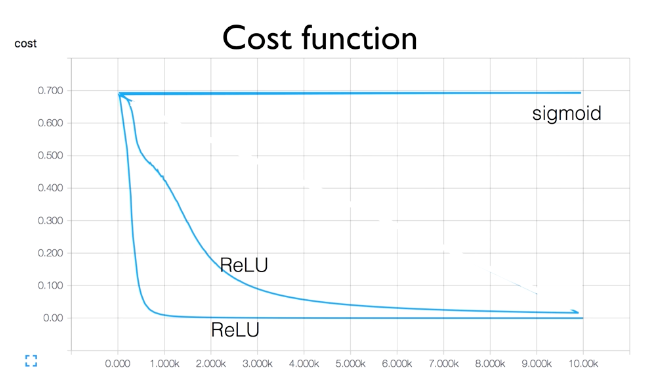

In [ ]:
# ReLU 함수 구현

---
## 1. 라이브러리 import하기

In [ ]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.5.0


## 2. 데이터 준비하기!

 fashion mnist와 비슷한 손글씨 분류 mnist 데이터셋을 불러옵니다!

 * **MNIST 데이터셋**이란?
  * 인공지능 연구의 권위자 LeCun교수가 만든 데이터셋
  * 숫자 0~9까지의 손글씨 이미지의 집합이다.
  * 학습데이터 60,000개(확인용데이터 5000개), 테스트데이터 10,000개로 구성 되어 있다.
  * 사이즈는 28x28의 크기를 가진다. 이미지의 값은 0 또는 1이다 (흑,백)
  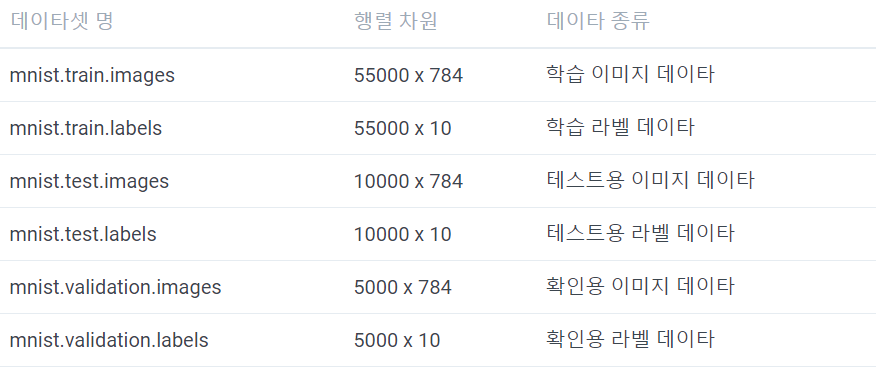


In [ ]:
# tf.keras.mnist 데이터 load하기!

print('shape of x_train:', x_train.shape)
print('shape of y_train:', y_train.shape)
print('shape of x_test:', x_test.shape)
print('shape of y_test:', y_test.shape)

숫자가 다른 건 숫자를 구성하는 픽셀의 진하기 차이라 생각하시면 됩니다!

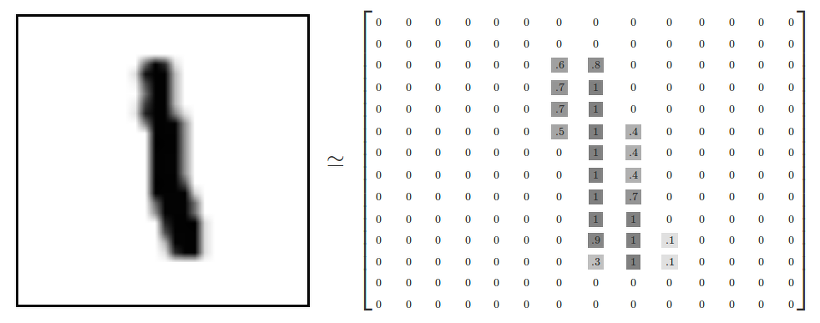



*   **plt.rcParams['figure.figsize']**: 차트의 기본 크기 설정
*  **plt.imshow**: 차트에 2차원 이미지 표시



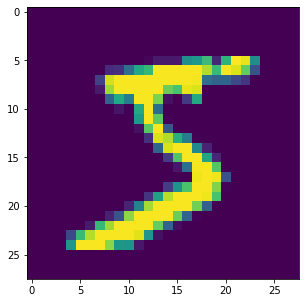

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5, 5)
plt.imshow(x_train[0])
plt.show()

## 3. 모델 구축하기

Deep Neural Network 모델의 input으로 넣기 위해

 * (28 by 28) 2차원 배열 (2D array) 이미지를 (28 * 28 = 784) 의 옆으로 길게 펼친 데이터 형태로 변형(Flatten() 메소드와 유사한 역할)
 * 0 ~ 255 사이의 값을 0~1 사이의 실수 값으로 변환

In [ ]:
# x_train, x_test 데이터 변형하고 실수 값으로 변환하기!

 * **add()**:차곡차곡 순서대로 원하는 층을 쌓아서 딥러닝 모델을 설계
 * **Dense()**
  * **units**: 층별 노드 개수를 지정
  * **activation**: 활성화 함수 지정

  hidden layer에서 'Relu' 활성화 함수를, Output 층에는 10개 classes에 대한 확률을 반환하므로 'softmax' 활성화 함수를 사용했습니다.


In [ ]:
# Sequential model

# layer 쌓기!
# hidden layer
# output

In [ ]:
# 모델 요약하기

  * **tf.keras.utils.plot_mode**l: 모델의 플롯을 출력
    * **to_file**: 플롯 이미지의 파일 이름

In [ ]:
# 모델 플롯 시각화해서 확인해보기

## 4. 모델 컴파일

  * **compile()**
    * **optimizer**: 오차 역전파 경사하강법 시 최적화 알고리즘
      * **sgd**: 확률적 경사 하강법
    * **loss function**: 손실 함수
      * **sparse_categorical_crossentropy**: 다중 분류 손실 함수
    * **metrics**: 성과 평가 지표

In [ ]:
# 모델 컴파일 하기

In [ ]:
# 또다른 방법, 더 유연하고 강한 compile 제공
import keras

model.compile(
    optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True), # nesterov: Optimization 기법들 중 하나! momentum과는 비슷하지만 다릅니다
    loss=keras.losses.sparse_categorical_crossentropy

)

## 5. 모델 학습

 * **epochs**: 전체 데이터를 반복(iteration) 사용해서 학습하는 횟수
 * **verbose = 1**: 모델 학습 진행상황 막대를 출력
 * **batch_size**: 한 번에 batch로 가져다가 학습에 사용하는 데이터의 수
 * **validation_split**: 검증용 데이터셋을 별도로 만들어놓지 않았을 때 학습용 데이터셋에서 지정한 비율.
 
 지정된 비율은 검증용 데이터셋으로 이용될 수 있음.

In [ ]:
# 모델 학습 시키기

## 6. 모델 평가하기

  * **evaluate()**: 모델의 손실 값(Loss value) 과 컴파일 단계에서 추가로 설정해준 성능지표 값 (Metrics values)을 Test set 에 대하여 평가

In [ ]:
# test set에 대한 모델 평가

313/313 [==============================] - 1s 2ms/step - loss: 0.0892


0.08923666924238205

## 7. 예측

*   **predict()**: 예측



In [ ]:
# 모델 예측

In [ ]:
# class 별 확률의 array return

In [ ]:
# 가장 확률이 높은 숫자는?

In [ ]:
# 실제 데이터와 일치하는지 확인해보자

In [ ]:
plt.imshow(x_test[0].reshape(28, 28))
plt.show()

## 8. 모델 저장, 불러오기

 딥러닝 모델의 성과 평가 결과 기준치를 충족하여 현장 적용이 가능하다면
 
 모델의 요소와 학습된 가중치 정보를 파일 형태로 저장하고, 배포, 로딩해서 활용할 수 있습니다.



In [ ]:
# HDF5 파일로 전체 모델/가중치 저장하기

model.save('mnist_dnn_model.h5')

In [ ]:
# 저장된 'mnist_dnn_model.h5' 모델/가중치 파일을 'new_model' 이름으로 불러오기

# 가중치와 optimizer를 포함한 정확히 똑같은 모델을 다시 만들자.
new_model = tf.keras.models.load_model('mnist_dnn_model.h5')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
